## Submitted by Aakarshit Kumar   www.linkedin.com/in/aakarshit-kumar/

# EDA(as per the Instructions) Using SQL Script

### Import necessary libraries

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from termcolor import colored
%matplotlib inline
from termcolor import cprint
import warnings
warnings.filterwarnings('ignore')

In [15]:
!pip install pymysql

### Setup SQL and Python Intergation

In [2]:
import pymysql

In [3]:
conn=pymysql.connect(host='localhost', user='root', password='1307')

In [4]:
cursor=conn.cursor()

In [5]:
conn=pymysql.connect(host='localhost', user='root', password='1307', database='PRT_db')

In [6]:
q1='use PRT_db' 
cursor.execute(q1)

0

In [7]:
q2='show tables' 
cursor.execute(q2)

1

### Importing script with python to perform EDA using SQL Script

In [9]:

query = "SELECT * FROM sql_prt"
df = pd.read_sql(query, conn)

In [19]:
cprint('Head of the Dataset:', 'white', 'on_grey', attrs=['bold'])

df.head().style.set_properties(**{'background-color':'#F4DA59','color':'black','border': '2.5px solid black'})


Head of the Dataset:


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539.000000,Clean & quiet apt home by the park,2787.000000,John,Brooklyn,Kensington,40.647490,-73.972370,Private room,149.000000,1.000000,9.000000,2018-10-19 00:00:00,0.210000,6.000000,365.000000
1,2595.000000,Skylit Midtown Castle,2845.000000,Jennifer,Manhattan,Midtown,40.753620,-73.983770,Entire home/apt,225.000000,1.000000,45.000000,2019-05-21 00:00:00,0.380000,2.000000,355.000000
2,3647.000000,THE VILLAGE OF HARLEM....NEW YORK !,4632.000000,Elisabeth,Manhattan,Harlem,40.809020,-73.941900,Private room,150.000000,3.000000,0.000000,NaT,nan,1.000000,365.000000
3,3831.000000,Cozy Entire Floor of Brownstone,4869.000000,LisaRoxanne,Brooklyn,Clinton Hill,40.685140,-73.959760,Entire home/apt,89.000000,1.000000,270.000000,2019-07-05 00:00:00,4.640000,1.000000,194.000000
4,5022.000000,Entire Apt: Spacious Studio/Loft by central park,7192.000000,Laura,Manhattan,East Harlem,40.798510,-73.943990,Entire home/apt,80.000000,10.000000,9.000000,2018-11-19 00:00:00,0.100000,1.000000,0.000000


In [20]:
cprint('Tail of the Dataset:', 'white', 'on_grey', attrs=['bold'])

df.tail().style.set_properties(**{'background-color':'#CDC0B0','color':'black','border': '2.5px solid black'})

Tail of the Dataset:


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
6598,174527.000000,Cozy private family home in Bushwick,833926.000000,Kris,Brooklyn,Bushwick,40.690550,-73.923570,Entire home/apt,150.000000,2.000000,11.000000,2018-10-28 00:00:00,0.460000,1.000000,0.000000
6599,174966.000000,Luxury 2Bed/2.5Bath Central Park View,836168.000000,Henry,Manhattan,Upper West Side,40.773500,-73.986970,Entire home/apt,2000.000000,30.000000,30.000000,2018-05-05 00:00:00,0.330000,11.000000,0.000000
6600,176135.000000,Cosy Sunny 1brm in Prospect Heights,842125.000000,Jennifer,Brooklyn,Crown Heights,40.675050,-73.959690,Entire home/apt,97.000000,3.000000,31.000000,2018-10-23 00:00:00,0.320000,1.000000,193.000000
6601,176653.000000,East Village bedroom w rooftop,844862.000000,Cj,Manhattan,East Village,40.729740,-73.982010,Private room,100.000000,4.000000,49.000000,2019-05-07 00:00:00,0.510000,2.000000,43.000000
6602,nan,None,nan,None,None,None,nan,nan,None,nan,nan,nan,NaT,nan,nan,nan


# Exploratory Data Analysis

In [130]:
cprint('Shape of the Dataset:','red','on_yellow', attrs=['bold'])

print('The Shape of the dataset is : ',df.shape)


Shape of the Dataset:
The Shape of the dataset is :  (6603, 16)


In [131]:
cprint('Dimention of the Dataset:','red','on_yellow', attrs=['bold'])
df.ndim

Dimention of the Dataset:


2

In [25]:
cprint('Features of the Dataset:','red','on_yellow', attrs=['bold'])

for i in df.columns:
    print(i)

Features of the Dataset:
id
name
host_id
host_name
neighbourhood_group
neighbourhood
latitude
longitude
room_type
price
minimum_nights
number_of_reviews
last_review
reviews_per_month
calculated_host_listings_count
availability_365


In [26]:
cprint('Basic Summary of the Dataset:','red','on_yellow', attrs=['bold'])

df.info()

Basic Summary of the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              1497 non-null   float64       
 1   name                            1497 non-null   object        
 2   host_id                         1497 non-null   float64       
 3   host_name                       1494 non-null   object        
 4   neighbourhood_group             1497 non-null   object        
 5   neighbourhood                   1497 non-null   object        
 6   latitude                        1497 non-null   float64       
 7   longitude                       1497 non-null   float64       
 8   room_type                       1497 non-null   object        
 9   price                           1497 non-null   float64       
 10  minimum_nights                  1497 non-n

In [132]:
cprint('Count of Null Values in the Dataset:','red','on_yellow', attrs=['bold'])
df.isnull().sum()


Count of Null Values in the Dataset:


id                                5106
name                              5106
host_id                           5106
host_name                         5109
neighbourhood_group               5106
neighbourhood                     5106
latitude                          5106
longitude                         5106
room_type                         5106
price                             5106
minimum_nights                    5106
number_of_reviews                 5106
last_review                       5160
reviews_per_month                 5160
calculated_host_listings_count    5106
availability_365                  5106
dtype: int64

### As we can see there are large count of null values so if we will them using feature negineering orr using mean, mode, median , It will make a drastic impact on our dataset. so we will remove these NULL VALUES

In [133]:
cprint('Dropping Null Values:','red','on_yellow', attrs=['bold'])

df_1=df.dropna()

Dropping Null Values:


In [134]:
cprint('Successfuly removed the null values from the dataset:','red','on_yellow', attrs=['bold'])

df_1.isnull().sum()

Successfuly removed the null values from the dataset:


id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [135]:
cprint('Shape of our dataset after removing Null Values:','red','on_yellow', attrs=['bold'])

df_1.shape

Shape of our dataset after removing Null Values:


(1440, 16)

In [136]:
cprint('Statisticall Summary of the Dataset:','red','on_yellow', attrs=['bold'])

df.describe()

Statisticall Summary of the Dataset:


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1497.000000,1.497000e+03,1497.000000,1497.000000,1497.000000,1497.000000,1497.000000,1443.000000,1497.000000,1497.000000
mean,72188.370741,3.215084e+05,40.729359,-73.963020,152.246493,8.006012,94.695391,1.041040,2.088176,183.468938
std,50802.734234,3.977468e+05,0.051561,0.032062,127.003505,16.395328,99.015127,1.027992,3.172235,128.614196
min,2539.000000,2.787000e+03,40.586150,-74.085460,33.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,28321.000000,7.485700e+04,40.686560,-73.984190,85.000000,2.000000,19.000000,0.270000,1.000000,42.000000
50%,62452.000000,2.561610e+05,40.721850,-73.962180,125.000000,3.000000,54.000000,0.680000,1.000000,209.000000
75%,112100.000000,4.535190e+05,40.759610,-73.947940,189.000000,5.000000,147.000000,1.570000,2.000000,297.000000
max,176653.000000,6.197784e+06,40.897470,-73.761330,2000.000000,200.000000,480.000000,6.700000,28.000000,365.000000


In [137]:
cprint('Statistical Summary of the important features of the Dataset:','red','on_yellow', attrs=['bold'])

df_1[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

Statistical Summary of the important features of the Dataset:


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000
mean,152.120833,7.804167,98.354167,1.042271,2.106250,184.050000
std,126.867780,16.061314,99.180987,1.028708,3.221361,126.621624
min,33.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,85.000000,2.000000,22.750000,0.270000,1.000000,50.500000
50%,125.000000,3.000000,61.000000,0.680000,1.000000,209.000000
75%,185.000000,5.000000,150.000000,1.577500,2.000000,294.250000
max,2000.000000,200.000000,480.000000,6.700000,28.000000,365.000000


Visualization of the features of the Dataset:


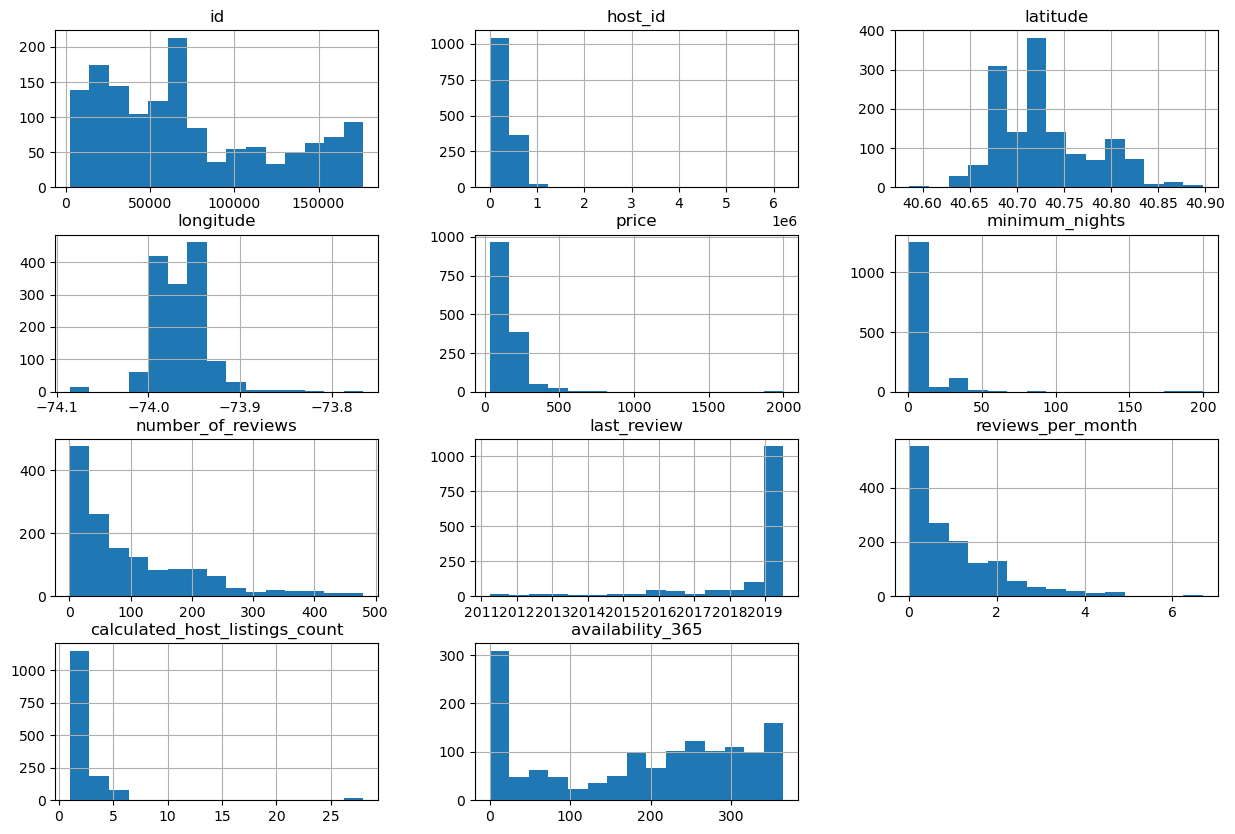

In [138]:
cprint('Visualization of the features of the Dataset:','red','on_yellow', attrs=['bold'])

df_1.hist(bins=15, figsize=(15,10));

Checking for the outliers:


<Axes: >

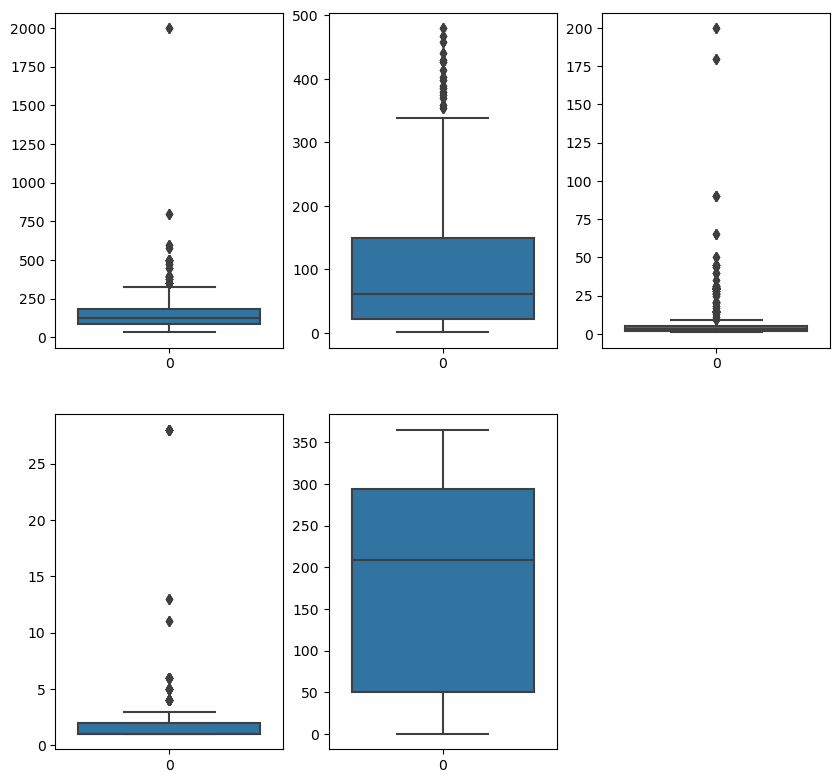

In [139]:
cprint('Checking for the outliers:','red','on_yellow', attrs=['bold'])

plt.figure(figsize=(10,20))
plt.subplot(4,3,1)
sns.boxplot(df_1['price'])

plt.subplot(4,3,2)
sns.boxplot(df_1['number_of_reviews'])

plt.subplot(4,3,3)
sns.boxplot(df_1['minimum_nights'])

plt.subplot(4,3,4)
sns.boxplot(df_1['calculated_host_listings_count'])

plt.subplot(4,3,5)
sns.boxplot(df_1['availability_365'])






### this data is a hotel data so removing outliers cannot be a good solution because the prices of rooms are based on the peak dayss, festivals, holidays.
### Insead of removing the outliers we can analyse data with outliers or withoutlierss to check the accuracy of the model

In [140]:
cprint('Count of Type of Room Based on Neightbourhood:','red','on_yellow', attrs=['bold'])

df_1.groupby(['room_type'])['neighbourhood'].count()

Count of Tyoe of Room Based on Neightbourhood:


room_type
Entire home/apt    846
Private room       582
Shared room         12
Name: neighbourhood, dtype: int64

### we can clearly see that the homes and appartment are  frequently booked they have the highest number of booking while shared rooms are booked very less
### so we have to keep in ming that the managiing cost of above two categories will be high and the demand of above two categories is also very high.

In [141]:
cprint('Count of Tyoe of Room Based on Neightbourhood_group:','red','on_yellow', attrs=['bold'])

df_1.groupby(['room_type'])['neighbourhood_group'].count()

Count of Tyoe of Room Based on Neightbourhood_group:


room_type
Entire home/apt    846
Private room       582
Shared room         12
Name: neighbourhood_group, dtype: int64

In [142]:
cprint('Count of Type of Room Based on Price:','red','on_yellow', attrs=['bold'])

df_1.groupby(['room_type'])['price'].sum()

Count of Tyoe of Room Based on Price:


room_type
Entire home/apt    162852.0
Private room        55425.0
Shared room           777.0
Name: price, dtype: float64

In [200]:
cprint('Count of Type of Room Based on MInimum NIghts:','red','on_yellow', attrs=['bold'])

m_night = df.groupby(['minimum_nights'])['room_type'].count().reset_index()
m_night = m_night.sort_values(by='minimum_nights', ascending=False)
print('Top 5',m_night.head(5))
print('Bottom 5', m_night.tail(5))

Count of Type of Room Based on MInimum NIghts:
Top 5     minimum_nights  room_type
34           200.0          3
33           180.0          3
32            90.0          9
31            65.0          3
30            60.0          3
Bottom 5    minimum_nights  room_type
4             5.0        102
3             4.0        132
2             3.0        330
1             2.0        399
0             1.0        162


In [144]:
cprint('Count of Neightbourhood:','red','on_yellow', attrs=['bold'])

df_1.groupby(['neighbourhood_group'])['neighbourhood_group'].count()

Count of Neightbourhood:


neighbourhood_group
Bronx             18
Brooklyn         687
Manhattan        657
Queens            63
Staten Island     15
Name: neighbourhood_group, dtype: int64

### group 'Brooklyn','Manhattan' have the maximum count of  group as compare to the other groups

Correlation Bbetween different features:


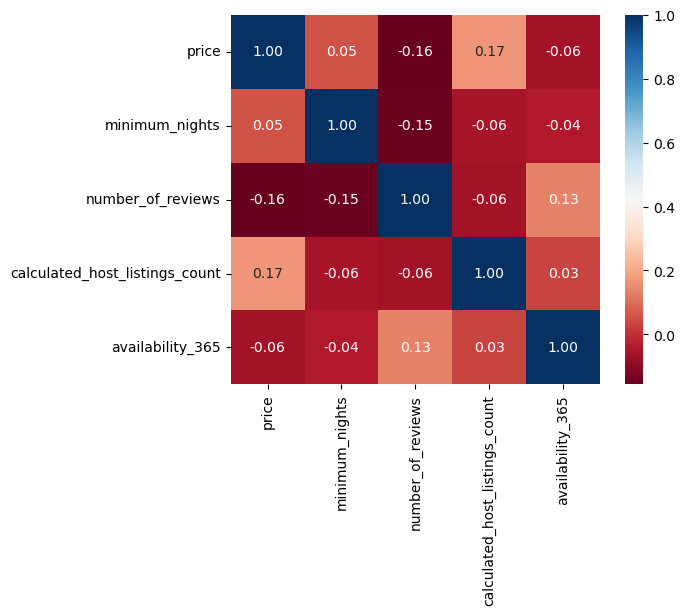

In [145]:
cprint('Correlation Bbetween different features:','red','on_yellow', attrs=['bold'])

corr = df_1[['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']].corr()

sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);


### As we can see with the above heat map not even a single feature has a high correlation with other. so based on this analysis we can see our model will may show less accuracy

Average Room Price:
room_type
Entire home/apt    192.50
Private room        95.23
Shared room         64.75
Name: price, dtype: float64


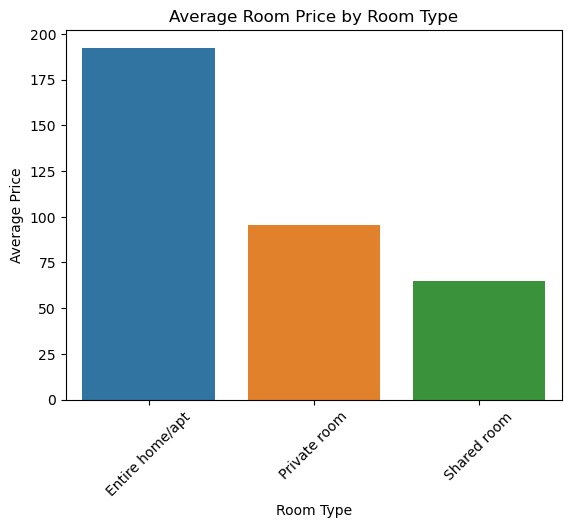

In [146]:
cprint('Average Room Price:','red','on_yellow', attrs=['bold'])

#average price per room type
avg_room_price = round(df_1.groupby('room_type').price.mean(), 2).sort_values(ascending=False)
print(avg_room_price)
avg_room_price=pd.DataFrame(avg_room_price).reset_index()
avg_room_price
sns.barplot(x='room_type', y='price', data=avg_room_price)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.title('Average Room Price by Room Type')
plt.show()


Average minimum nights based on room type:
         room_type  minimum_nights
0  Entire home/apt            9.76
1     Private room            5.04
2      Shared room            4.25


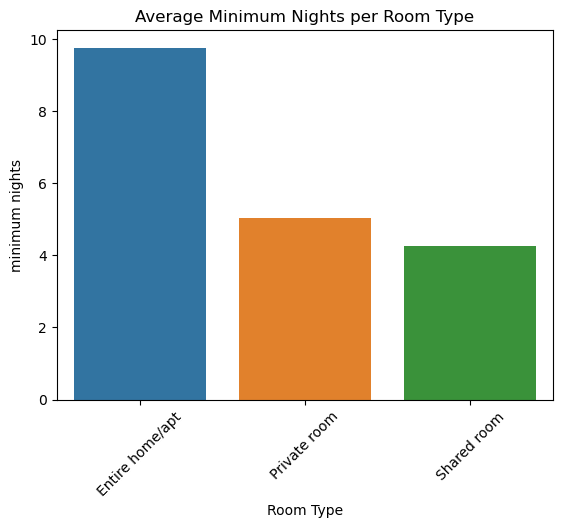

In [148]:
cprint('Average minimum nights based on room type:','red','on_yellow', attrs=['bold'])

avg_room_type_nights = round(df_1.groupby('room_type').minimum_nights.mean(), 2).sort_values(ascending=False)
# print(avg_room_type_nights)
avg_room_type_nights=pd.DataFrame(avg_room_type_nights).reset_index()
print(avg_room_type_nights)
sns.barplot(x='room_type', y='minimum_nights', data=avg_room_type_nights)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.xlabel('Room Type')
plt.ylabel('minimum nights')
plt.title('Average Minimum Nights per Room Type')
plt.show()

Avrage price based on Neighbourhood_group:
  neighbourhood_group   price
0           Manhattan  166.18
1            Brooklyn  146.68
2              Queens  115.43
3               Bronx   65.67
4       Staten Island   43.20


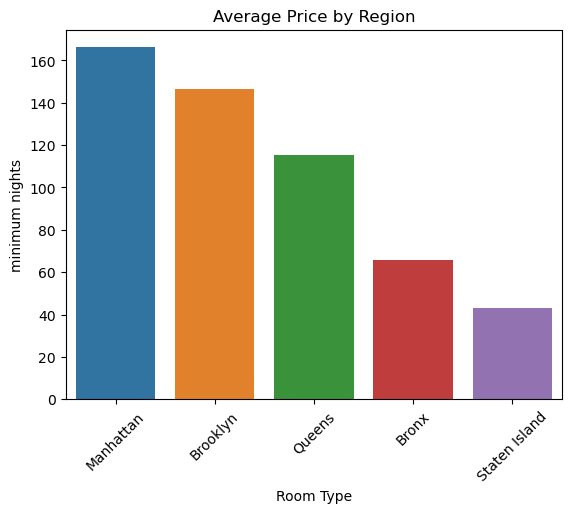

In [201]:
cprint('Avrage price based on Neighbourhood_group:','red','on_yellow', attrs=['bold'])

avg_price_region = round(df_1.groupby('neighbourhood_group').price.mean().sort_values(ascending=False), 2)
avg_price_region=pd.DataFrame(avg_price_region).reset_index()
print(avg_price_region)
sns.barplot(x='neighbourhood_group', y='price', data=avg_price_region)
plt.xticks(rotation=45)
plt.xlabel('Room Type')
plt.ylabel('minimum nights')
plt.title('Average Price by Region')
plt.show()



Price of the hotel rooms based on location:


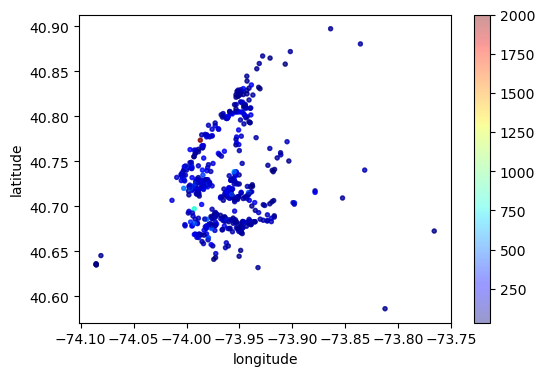

In [188]:
cprint('Price of the hotel rooms based on location:','red','on_yellow', attrs=['bold'])

df_1.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_1['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(6,4));


#  Machine Learning Model
## Price Prediction Based on Features


In [155]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [152]:
oe=OrdinalEncoder()

In [163]:
df_1['neighborhood_group_new']=oe.fit_transform(df_1[['neighbourhood_group']])
df_1['neighbourhood_new']=oe.fit_transform(df_1[['neighbourhood']])
df_1['room_type_new']=oe.fit_transform(df_1[['room_type']])


In [169]:
x=df_1[[ 'minimum_nights', 'number_of_reviews', 'reviews_per_month','neighborhood_group_new',
       'neighbourhood_new','room_type','room_type_new']]
y=df_1['price']
   

In [174]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [170]:
lr = LinearRegression()


In [175]:
lr.fit(x_train,y_train)

LinearRegression()

In [176]:
y_pred=lr.predict(x_test)

In [177]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [189]:
print('Mean Square Error',mse)
print('Mean Aboslute Error',mae)
print('R2 score',r2)

Mean Square Error 19370.861368870956
Mean Aboslute Error 65.68597703266502
R2 score 0.12359856465823793


# Random Forest Model

In [180]:
from sklearn.ensemble import RandomForestRegressor


In [183]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [184]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model

RandomForestRegressor(random_state=42)

In [185]:
rf_model.fit(X_train, Y_train)


RandomForestRegressor(random_state=42)

In [186]:
y_pred = rf_model.predict(X_test)


In [190]:
mse_1 = mean_squared_error(y_test, y_pred)
mae_1 = mean_absolute_error(y_test, y_pred)
r2_1= r2_score(y_test, y_pred)

print('Mean Square Error',mse_1)
print('Mean Aboslute Error',mae_1)
print('R2 score',r2_1)

Mean Square Error 821.4243256944444
Mean Aboslute Error 14.698333333333336
R2 score 0.9628360636961593


### As we can see Linear model is far better than Random Forest Model

### The Result of Linear Regression model is 65% which is not that much good but there can be a lot's of reaons like:
### 1. Our dataset is highly imbalance
### 2. It has lots of missing values ( around 5k)
### 3. we can improve our model by adding dummie data to increase the model accuracy
### 4.  we can use different models and there Hyper Parameters to increase the accuracy of the model
